In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42) # For reproducibility

In [2]:
# Setting parameters for synthetic data
N_SAMPLES = 2000      # Total number of time steps
TIME_INTERVAL = 15

### Assumptions for the Cryogenic System Simulation:
#### - Temperature range: Typical cryogenic conditions (e.g., 4 K to 20 K).
#### - Pressure: Vacuum system range (e.g., 10^-6 bar to 10^-4 bar).
#### - External ambient temperature: Assumed ~300 K (not directly affecting a well-insulated cryostat).
#### - Operational power input: Variable, depending on the system's cooling cycle and load.

### Hypothetical Scenario Considered:
#### - The cryogenic chamber exhibits cyclical behaviour due to cooling cycles.
#### - Random fluctuations are introduced to simulate sensor noise and external influences.
#### - Drift components are added to reflect gradual system changes over time.

In [6]:
'''
Time Generation --- January 1 is a a placeholder to establish a starting point for 
generating synthetic time-series data. It can be adjusted according to a specific context.
'''
start_time = datetime(2025, 1, 1, 0, 0, 0)
time_stamps = [start_time + timedelta(minutes=i*TIME_INTERVAL) for i in range(N_SAMPLES)]

## Simulate Variables

### 1. Chamber Temperature
#### Assuming a base sinusoidal pattern plus some noise

In [7]:
base_temp = 10  # base average temperature in K
amplitude_temp = 6  # amplitude of temperature oscillation
period = 1440 / TIME_INTERVAL  # cyclical period in number of samples for one day (1440 minutes) cycle

In [9]:
temperature = []
for i in range(N_SAMPLES):
    # sinusoidal pattern
    sin_component = amplitude_temp * np.sin(2 * np.pi * i / period)
    # small random noise
    noise_component = np.random.normal(0, 0.5)
    # slow drift over time (either up or down)
    drift = 0.002 * i
    val = base_temp + sin_component + noise_component + drift
    temperature.append(val)

### 2. Chamber Pressure (bar, on a log scale for vacuum)
#### Assuming base around 1e-5 bar, with random fluctuations:

In [10]:
pressure = []
for i in range(N_SAMPLES):
    # random log fluctuations
    log_pressure = -5 + 0.2 * np.random.randn()  # -5 ~ 1e-5 bar
    # include minor correlation with temperature
    # (a simplistic assumption: slightly higher T => higher pressure)
    correlation_factor = (temperature[i] - base_temp) * 0.02
    log_pressure += correlation_factor
    pressure.append(10 ** log_pressure)

### 3. External Ambient Temperature (K), typically around 300 K

In [11]:
external_temp = 300 + 2 * np.sin(2 * np.pi * np.array(range(N_SAMPLES)) / (period * 2)) \
                + np.random.normal(0, 0.3, N_SAMPLES)

### 4. Power Input (arbitrary units)
#### Assuming some operational power that rises and falls in partial correlation with temperature demand

In [12]:
power_input = 100 + 20 * np.random.randn(N_SAMPLES)
power_input = np.clip(power_input, 0, 200)  # clamp to [0, 200]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Simulating Variables Completed
### Building Dataframe and Saving the Dataset

In [13]:
data = pd.DataFrame({
    'timestamp': time_stamps,
    'chamber_temp_K': temperature,
    'chamber_pressure_bar': pressure,
    'external_temp_K': external_temp,
    'power_input': power_input
})

In [14]:
data.head()

,timestamp,chamber_temp_K,chamber_pressure_bar,external_temp_K,power_input
0,2025-01-01 00:00:00,10.248357,0.000007,299.740952,77.718373
1,2025-01-01 00:15:00,10.325287,0.000009,300.056077,87.381383
2,2025-01-01 00:30:00,11.111001,0.000007,300.136211,81.158796
3,2025-01-01 00:45:00,11.938057,0.000009,300.337823,89.040084
4,2025-01-01 01:00:00,11.443838,0.000004,299.850995,95.716994


In [15]:
data.to_csv('cryogenic_chamber_data.csv', index=False)
print("Synthetic cryogenic chamber data generated and saved to 'cryogenic_chamber_data.csv'.")

Synthetic cryogenic chamber data generated and saved to 'cryogenic_chamber_data.csv'.


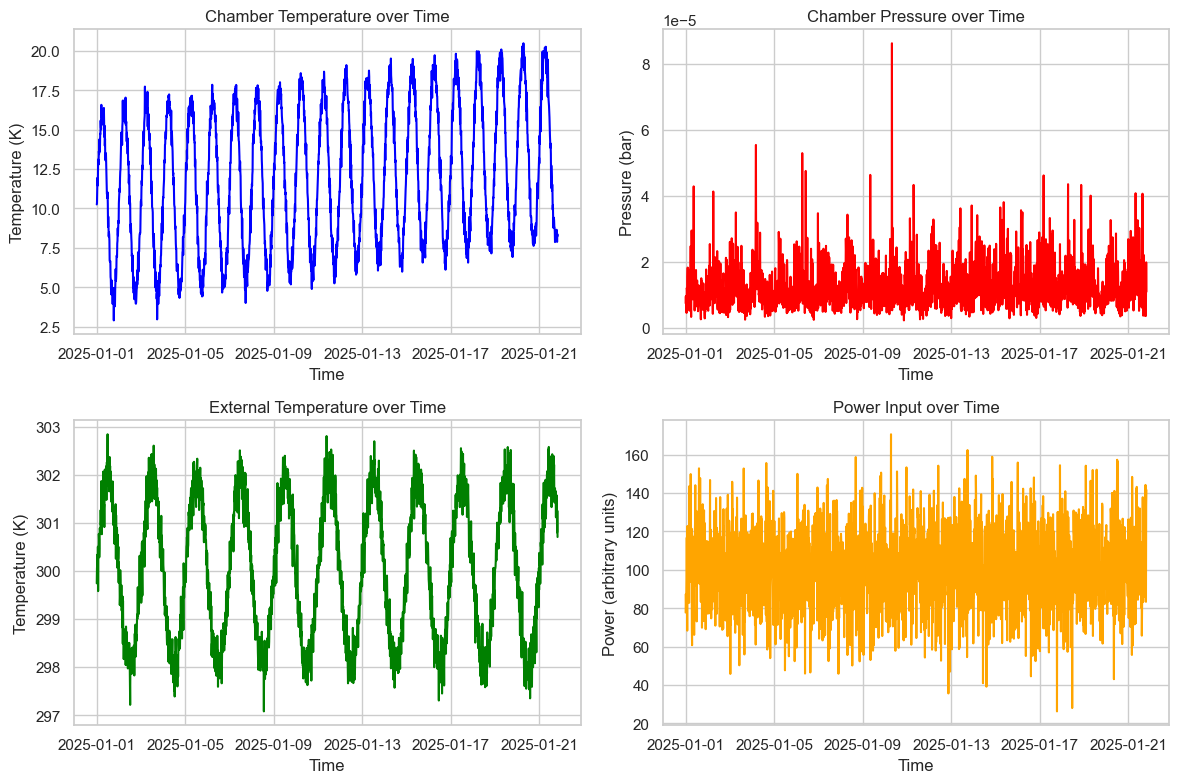

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

axes[0].plot(data['timestamp'], data['chamber_temp_K'], label='Chamber Temp (K)', color='blue')
axes[0].set_title("Chamber Temperature over Time")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Temperature (K)")

axes[1].plot(data['timestamp'], data['chamber_pressure_bar'], label='Chamber Pressure (bar)', color='red')
axes[1].set_title("Chamber Pressure over Time")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Pressure (bar)")

axes[2].plot(data['timestamp'], data['external_temp_K'], label='External Temp (K)', color='green')
axes[2].set_title("External Temperature over Time")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Temperature (K)")

axes[3].plot(data['timestamp'], data['power_input'], label='Power Input', color='orange')
axes[3].set_title("Power Input over Time")
axes[3].set_xlabel("Time")
axes[3].set_ylabel("Power (arbitrary units)")

plt.tight_layout()
plt.show()